# Tasca M7 T01

### Ex1
##### Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt
##### We choose: KNN & SVM Classifications!

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd

columnes= ['Class','Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv(r"wineData.csv", names=columnes)
# data = openFileTable(path_name, "housing data.csv", separator, columnes)
print (df.head())


   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [20]:
df.shape

(178, 14)

In [21]:
df.isnull().sum()
# Wonderful, no Nulls!

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [22]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

5. Number of Instances

   class 1 59
	class 2 71
	class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None

9. Class Distribution: number of instances per class

   class 1 59
	class 2 71
	class 3 48


<AxesSubplot:>

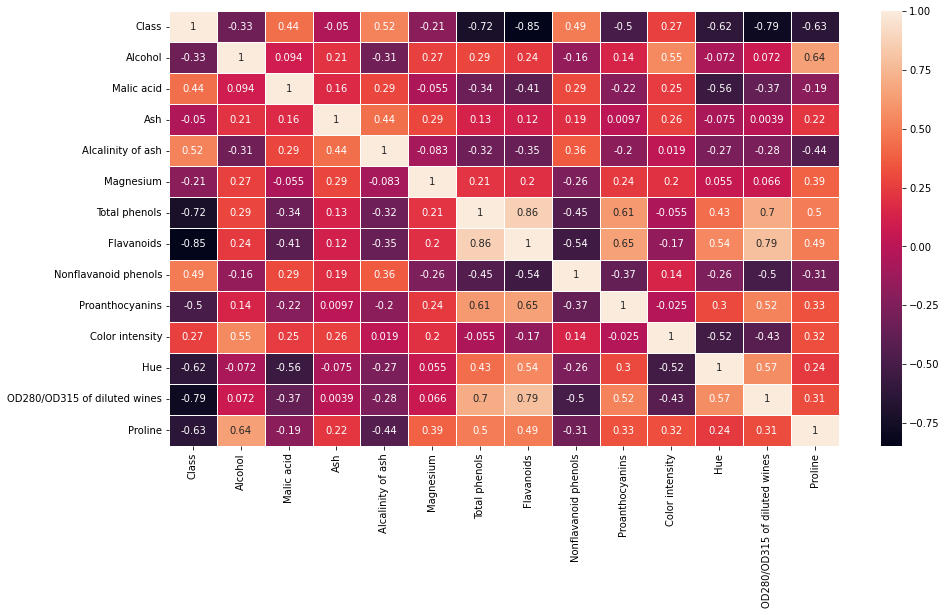

In [23]:
# check correlation
import seaborn as sns
import matplotlib.pyplot as plt
df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot=True , lw=1 )

###### Just a interesting possitive correlation between Class and Alcalinity & Nonflavanoid, plus a lot of non correlation and negative values.

#### Load Libraries

In [24]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#dataset & Prepare Target
X = df.iloc[:, 1:14].values
y = df.iloc[:, 0].values
# print (X)
# 40% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(106, 13)
(72, 13)
(106,)
(72,)


##### Model 1= KNN Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier

classifierKNN = KNeighborsClassifier()
classifierKNN.fit(X_train, y_train)

# Predicting the Test set results
y_predKNN = classifierKNN.predict(X_test)

##### Model 2= SVM Classification

In [27]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state = 0)
trained_model=classifierSVM.fit(X_train,y_train)
trained_model.fit(X_train,y_train )

# Predicting the Test set results
y_predSVM = classifierSVM.predict(X_test)

### Ex2
##### Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

##### Model 1= KNN Classification

In [28]:
#Evaluating KNN for Classification
accuracy =  classifierKNN.score(X_test, y_test)
print(accuracy)

0.6666666666666666


###### 66% right!!!
###### Let's check if we have unbalanced classes, so calculate for each class using confusion_matrix() and classification_report()

              precision    recall  f1-score   support

           1       0.72      0.95      0.82        22
           2       0.72      0.68      0.70        31
           3       0.43      0.32      0.36        19

    accuracy                           0.67        72
   macro avg       0.63      0.65      0.63        72
weighted avg       0.65      0.67      0.65        72



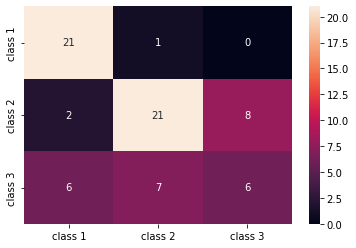

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_predKNN), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_predKNN))

###### Plenty of false positive and negative cases in class 2 and huge % in class 3!

##### Model 2= SVM Classification

In [30]:
accuracySVM =  classifierSVM.score(X_test, y_test)
print(accuracySVM)

0.9583333333333334


###### 95% right!!!
###### Let's check if we have unbalanced classes, so calculate for each class using confusion_matrix() and classification_report()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.90      0.95        31
           3       0.86      1.00      0.93        19

    accuracy                           0.96        72
   macro avg       0.95      0.97      0.96        72
weighted avg       0.96      0.96      0.96        72



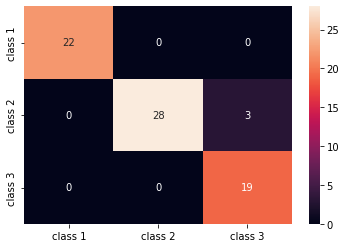

In [31]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_predSVM), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_predSVM))

###### Now Class 1 & 3 has 100%!! But class 2 had 3 wrongly classified! Not bad results!

### Ex3  
##### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
##### Let's try with KNN

In [32]:
classifierKNN2 = KNeighborsClassifier(n_neighbors=6)
classifierKNN2.fit(X_train, y_train)

# Predicting the Test set results
y_predKNN = classifierKNN2.predict(X_test)

In [33]:
#Evaluating KNN for Classification
accuracy =  classifierKNN2.score(X_test, y_test)
print(accuracy)

0.7361111111111112


###### Accuracy before was 66% now is 73%. Here we just play changing the number of neighbors, increasing from 5 (default) to 6.
###### So Params has a huge impact in the results!

### Ex4 
##### Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [35]:
# aplicar cross-validation: GridSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

param_grid={'n_estimators': range(100, 500, 50),'max_features': range(2, 5, 1) }
gsc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='r2', cv=5)

grid_model = gsc.fit(X_train, y_train)
predi_grid_train = grid_model.predict(X_train)
predi_grid_test = grid_model.predict(X_test)

print('Mean_Absolute_Error Train : ' , mean_absolute_error(predi_grid_train, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_grid_train, y_train))
print('Mean_Absolute_Error Test : ' ,mean_absolute_error(predi_grid_test, y_test))
print('Mean_Squared_Error Test: ' ,mean_squared_error(predi_grid_test, y_test))

Mean_Absolute_Error Train :  0.03954177897574126
Mean_Squared_Error Train:  0.004562418174817096
Mean_Absolute_Error Test :  0.12710317460317463
Mean_Squared_Error Test:  0.039775396825396825


####  

### Ex5 
##### Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)
##### Aplying Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#Scaler removes column names, so re-organize df
columnes= ['Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
scaled_df = pd.DataFrame(X_train_sc, columns=columnes)
scaled_df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02
mean,-3.502439e-15,-3.733910e-16,-2.359224e-15,1.402311e-15,-2.199498e-16,6.116700e-16,-3.142141e-17,2.241394e-16,-7.865825e-16,-1.068328e-16,-8.232408e-16,-3.351617e-17,-1.183540e-16
std,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00
min,-2.360510e+00,-1.313404e+00,-2.637202e+00,-2.329447e+00,-2.224967e+00,-1.955725e+00,-1.620990e+00,-1.817263e+00,-2.090506e+00,-1.607573e+00,-1.802198e+00,-1.910245e+00,-1.419139e+00
25%,-7.895106e-01,-6.615223e-01,-4.707213e-01,-6.960775e-01,-7.421219e-01,-7.869790e-01,-8.149791e-01,-8.361261e-01,-6.542830e-01,-8.470915e-01,-7.227585e-01,-9.507277e-01,-7.898811e-01
50%,6.383447e-02,-4.368873e-01,1.090053e-03,-4.135114e-02,-1.489839e-01,-1.103365e-01,1.150329e-01,-1.820348e-01,-1.265143e-01,-2.049074e-01,1.468021e-02,2.660516e-01,-2.520057e-01
75%,8.206882e-01,6.840855e-01,7.328791e-01,6.478345e-01,5.182963e-01,7.467442e-01,7.763749e-01,7.173407e-01,5.872712e-01,7.055575e-01,6.773063e-01,7.840519e-01,8.053082e-01
max,2.126336e+00,2.879783e+00,3.217110e+00,2.853228e+00,3.780555e+00,2.604436e+00,1.758054e+00,2.434330e+00,3.377524e+00,2.815893e+00,3.199560e+00,1.774858e+00,2.531159e+00


##### Model 1= KNN Classification

In [37]:
classifierKNN_sc = KNeighborsClassifier()
classifierKNN_sc.fit(X_train_sc, y_train)

# Predicting the Test set results
y_predKNN_sc = classifierKNN_sc.predict(X_test_sc)
#Evaluating KNN for Classification
accuracy =  classifierKNN_sc.score(X_test_sc, y_test)
print(accuracy)

0.9722222222222222


##### KNN before was 66% only, now 97% !!!!!!!!!!!!

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        22
           2       1.00      0.94      0.97        31
           3       0.95      1.00      0.97        19

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72



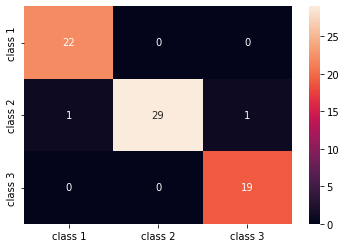

In [38]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_predKNN_sc), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_predKNN_sc))

###### Great improve! Just 2 false positive in class 2.

##### Model 2= SVM Classification

In [39]:
classifierSVM_sc = SVC(kernel = 'linear', random_state = 0)
trained_model_sc=classifierSVM_sc.fit(X_train_sc,y_train)
trained_model_sc.fit(X_train_sc,y_train )

# Predicting the Test set results
y_predSVM_sc = classifierSVM_sc.predict(X_test_sc)
accuracySVM_sc =  classifierSVM_sc.score(X_test_sc, y_test)
print(accuracySVM_sc)


0.9722222222222222


##### SVM was 95%, now improve to 97%!!!!
##### Let's evaluate each class using confusion_matrix() and classification_report()

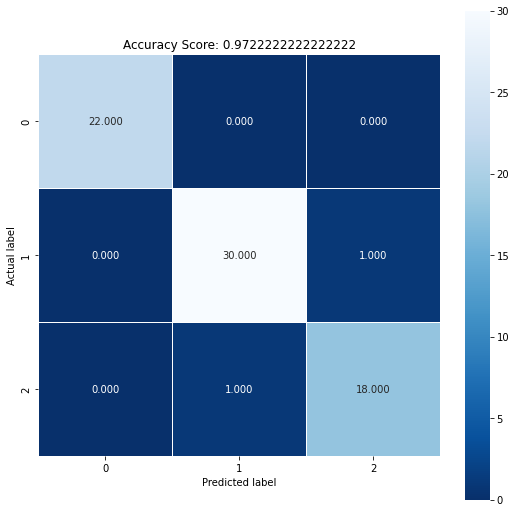

In [44]:
cm = metrics.confusion_matrix(y_test, y_predSVM_sc)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracySVM_sc)
plt.title(all_sample_title, size = 12);

###### Now just one wrong in class 2 and in class 3. Pretty improve!

#### Scaling data provides better results. 
#### And with this data, SVM build much better predictions than KNN (not the best to work well with categorical features!)